In [125]:
import pandas as pd 
from pathlib import Path
import sys
import requests
import csv
# Import scientific librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import requests
import json

# Add project directory to kernel paths
sys.path.append('../../')


print("We're running localy")

We're running localy


In [126]:
from src.data.file_manager import FileManager
weatherManager = FileManager()
color_pal = sns.color_palette()

In [127]:
# Make a GET request to the API endpoint
url = 'http://134.209.22.28/api/collections/weather/records'
response = requests.get(url)

In [128]:
# Check if the request was successful
if response.status_code == 200:
    # Load the response content as JSON
    data = json.loads(response.content)
    
    # Access the desired data
    items = data['items']
    
    # Iterate over the items
    for item in items:
        collection_id = item['collectionId']
        collection_name = item['collectionName']
        created = item['created']
        date = item['date']
        disease = item['disease']
        domain = item['domain']
        humidity = item['humidity']
        item_id = item['id']
        insect = item['insect']
        temperature = item['temperature']
        updated = item['updated']
        print(f"Temperature: {temperature}")
else:
    print(f"Request failed with status code: {response.status_code}")


Temperature: 32
Temperature: 31
Temperature: 31
Temperature: 36
Temperature: 34
Temperature: 28
Temperature: 25
Temperature: 31
Temperature: 34
Temperature: 33
Temperature: 31
Temperature: 35
Temperature: 29
Temperature: 37
Temperature: 29
Temperature: 34
Temperature: 31
Temperature: 33
Temperature: 32
Temperature: 31
Temperature: 37
Temperature: 30
Temperature: 13
Temperature: 22
Temperature: 24
Temperature: 17
Temperature: 12
Temperature: 22
Temperature: 26
Temperature: 14


In [129]:
data.pop('page', None)
data.pop('perPage', None)
data.pop('totalItems', None)
data.pop('totalPages', None)

123

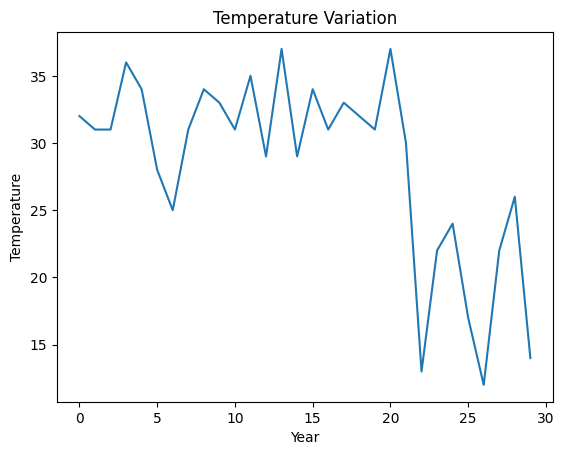

In [130]:
temperatures = [item['temperature'] for item in items]

# Create a line plot
plt.plot(temperatures)
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Temperature Variation')
plt.show()

In [131]:
# Create a DataFrame from the 'data' variable
df_vigne = pd.DataFrame(temperatures)
df_final = df_vigne.rename(columns={'0': 'ds'})
df_vigne


,0
0,32
1,31
2,31
3,36
4,34
5,28
6,25
7,31
8,34
9,33


In [132]:
raw_dir_path = weatherManager.data_dir / 'raw'

raw_path = str(raw_dir_path / 'theo_data.csv')
# df_vigne = df_vigne.reset_index()
df_vigne.to_csv(raw_path, index=False)

<Axes: >

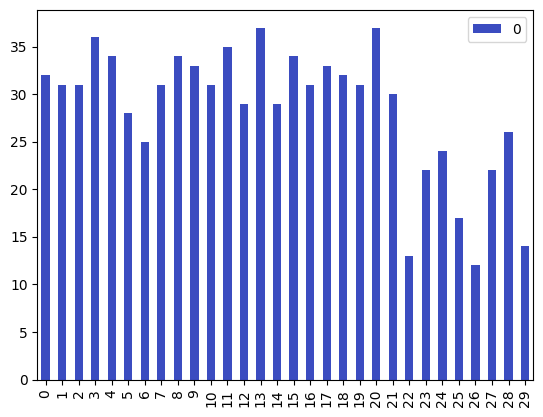

In [133]:
df_vigne.plot(kind='bar', stacked=True, colormap='coolwarm')

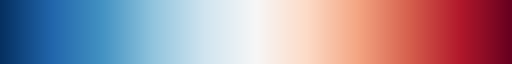

In [134]:
plt.get_cmap('RdBu_r')

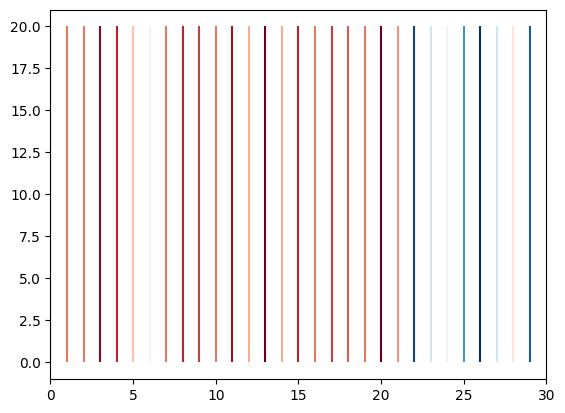

In [135]:
from numpy import interp

cmap = plt.get_cmap('RdBu_r')

temp_min = df_vigne.min()
temp_max = df_vigne.max()
mean = df_vigne.mean()

def getColor(temperature):
    value = temperature.iloc[0]  # Access the first value in the DataFrame
    return np.interp(value, [float(temp_min), float(mean), float(temp_max)], [0, 0.5, 1])

cpt = 0

# Iterate over the DataFrame rows
for index, row in df_vigne.iterrows():
    temperature = row[0]  # Assuming the temperature column is at index 0
    # Normalize the temperature value between 0 and 1
    norm_temp = (temperature - temp_min) / (temp_max - temp_min)
    
    # Get the color from the colormap based on the normalized temperature
    color = cmap(norm_temp)
    # Draw a vertical line at the specified position with the color
    plt.vlines(cpt, 0, 20, color=color)
    cpt += 1

# Set the x-axis limits
plt.xlim(0, len(df_vigne))

# Display the plot
plt.show()

In [136]:
# import matplotlib as mpl

# #Améliorations :
# cpt = 0
# height = 600
# width = 1100

# px = 1/plt.rcParams['figure.dpi']
# fig,ax = plt.subplots(figsize=(width*px,height*px))

# labels_years = []

# for index, row in df_vigne.iterrows():
#     temperature = row[0]  # Convert to float
#     plt.vlines(cpt, 0, height, linewidth=3, color=cmap(getColor(temperature)))
#     cpt += 1
#     if (int(row.name)) % 10 == 0:
#         labels_years.append(str(row.name))
#         print(row.name)
#     else:
#         labels_years.append("")

# plt.yticks(visible = False)
# plt.xticks(range(0,len(labels_years)),labels_years, rotation='vertical', fontsize=8)
# plt.box(False)
# plt.margins(x=0, y=0)
# plt.tick_params(axis='both', length = 0)
# plt.title("Évolution de l'humidité moyennes annuelles à Marseille", color="#444444", pad=12, fontsize=11, fontweight="bold")
# plt.text(0, -120, "Chaque barre représente une année. Plus l'humidité moyenne annuelle a été inférieure à l'humidité moyenne de toute la\npériode ("+str(round(mean,1))+" %), plus la barre est bleue. A l'inverse, plus elle est rouge. La période s'étend de 2000 à 2022.", fontsize=9,fontstyle="italic",linespacing=1.3, color="#2b2b2b")

# #colorbar
# # norm = mpl.colors.TwoSlopeNorm(vmin=min-mean,vcenter=0,vmax=max-mean)
# # cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),ax=ax,format="%.1f °C")
# # cb.set_label(label="Ecart d'humidité avec la moyenne de la période globale",fontsize=8,labelpad=10)

# plt.show()

In [137]:
# Améliorations:
# cpt = 0
# height = 600
# width = 1100

# px = 1 / plt.rcParams['figure.dpi']
# fig, ax = plt.subplots(figsize=(width * px, height * px))

# labels_years = []

# for row in df_vigne.iterrows():
#     temperature = row[0]
#     plt.vlines(cpt, 0, height, linewidth=3, color=cmap(getColor(temperature)))
#     cpt += 1

# plt.yticks(visible=False)
# plt.xticks(range(0, len(data)), labels_years, rotation='vertical', fontsize=8)
# plt.box(False)
# plt.margins(x=0, y=0)
# plt.tick_params(axis='both', length=0)
# plt.title("Évolution de l'humidité moyennes annuelles à Marseille", color="#444444", pad=12, fontsize=11, fontweight="bold")
# plt.text(0, -120, "Chaque barre représente une année. Plus l'humidité moyenne annuelle a été inférieure à l'humidité moyenne de toute la\npériode (" + str(round(mean, 1)) + " %), plus la barre est bleue. A l'inverse, plus elle est rouge. La période s'étend de 2000 à 2022.", fontsize=9, fontstyle="italic", linespacing=1.3, color="#2b2b2b")

# plt.show()
